## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: PPGEE0023 - Attribute Extraction

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---



## - Analysis of Spectral Features and Statistical Properties of Audio Signals:

For the music file used in the above activity (Activity I), calculate the following attributes:

1. Generate the spectrogram
2. Spectral flux
3. Spectral centroid
4. Zero-crossing rate

Plot the attribute values along with a segment of the signal in the time domain (on the same graph). Comment on and analyze the results obtained.

Perform statistical analysis by plotting histograms, box plots, and calculating the mean, standard deviation, skewness, and kurtosis for each attribute.

Repeat the above steps for the other two music files available in the shared folder (Dia Branco - Gereldo Azevedo and Angel - JackJackson):

Link of the New Songs: https://drive.google.com/drive/folders/1R4BLH07OTphRqhyRROax4r8mNiQUlImk?usp=sharing

Link of the Music (Yellow - Coldplay): https://drive.google.com/file/d/1kZFU98kHOombg0rfJf0JQdYP7f1-Ajti/view?usp=drive_link


---



## Importing Libraries:

---

In [37]:
# Install the necessary libraries
!pip install pydub  # Install the pydub library for audio processing
!apt-get install ffmpeg  # Install ffmpeg, required for manipulating audio files

# Importing the necessary libraries
import matplotlib.pyplot as plt  # Library for plotting graphs
import numpy as np  # Library for efficient numerical operations
from pydub import AudioSegment  # Library for reading and processing audio files
from scipy.signal.windows import gaussian  # Function to create a Gaussian window
from scipy.fft import fft  # Function to calculate the Fast Fourier Transform

import scipy.stats as stats  # For statistical calculations (mean, skewness, kurtosis, etc.)
from scipy import stats
from scipy.signal import find_peaks  # For spectral flux analysis to identify peaks
import librosa  # Library for audio processing and feature extraction
import librosa.display  # Tools for visualizing audio data (waveforms, spectrograms, etc.)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


## Spectrogram of the Musics:



---



THE SONGS ANALYZED WILL BE:
Song 1 - Yellow by Coldplay
Song 2 - Dia Branco by Geraldo Azevedo
Song 3 - Angel by Jack Johnson



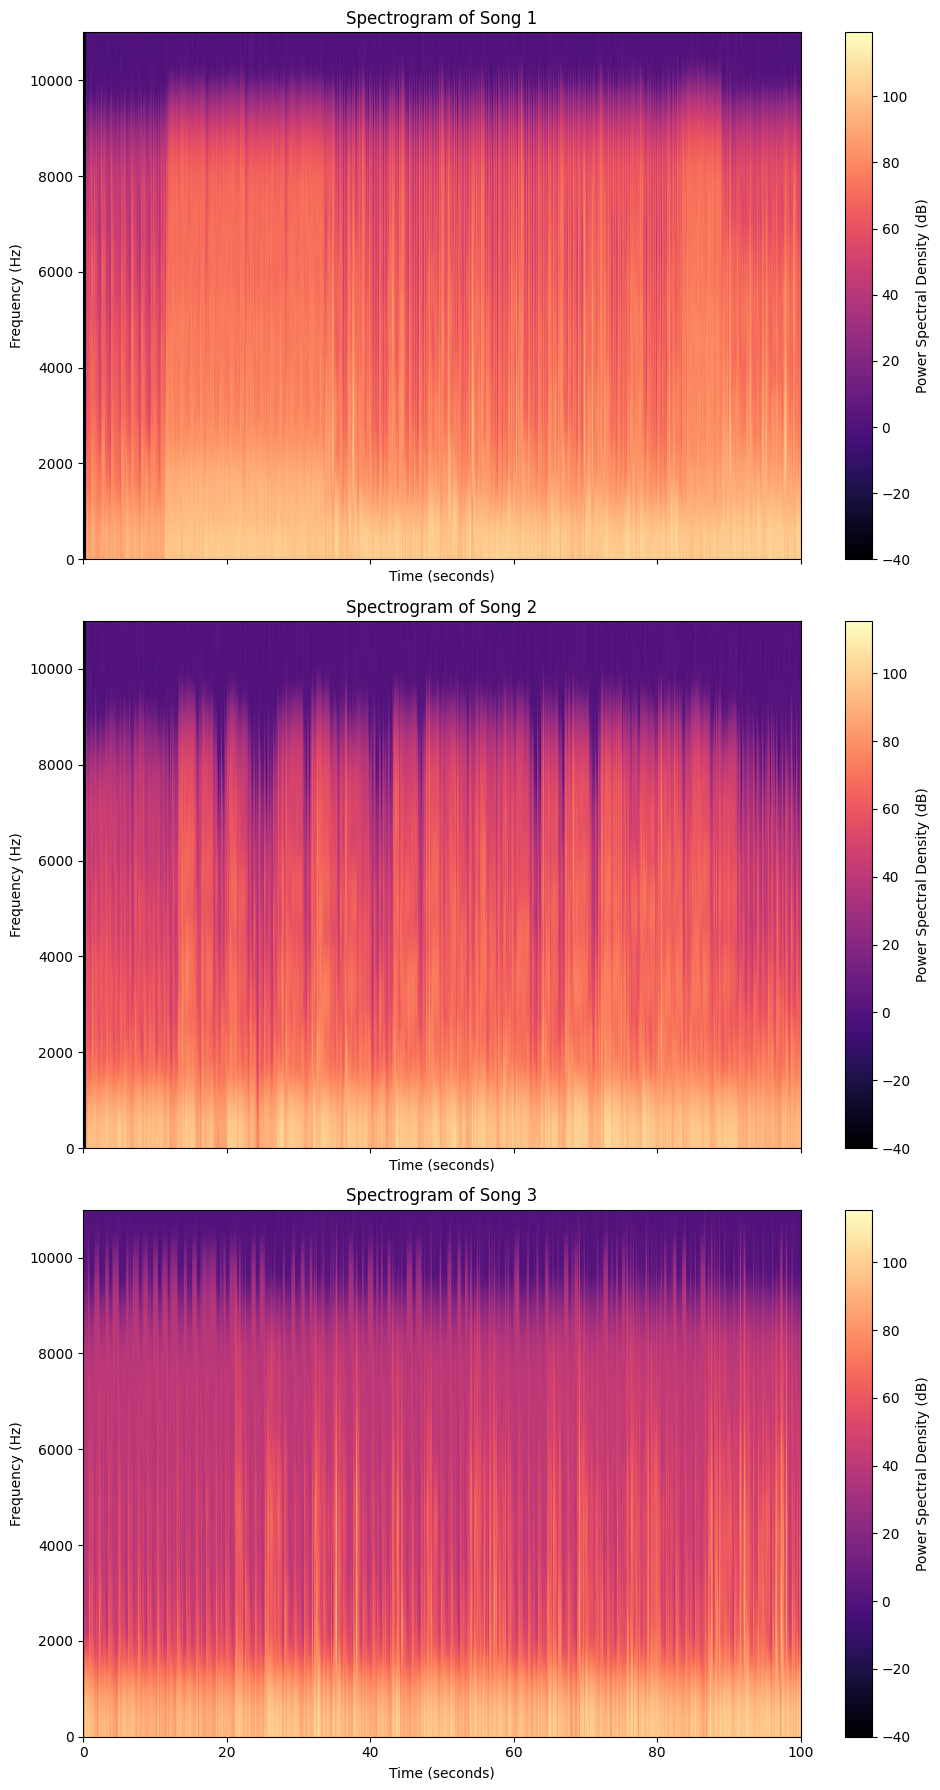

In [43]:
# SPECTROGRAM OF THE MUSICS:

# Function to generate and plot spectrogram
def plot_spectrogram(audio_path, cutting_time, title, ax):
    # Load the audio file using pydub
    audio = AudioSegment.from_file(audio_path, format='mp3')

    # Trim the audio to the cutting_time duration (in milliseconds)
    audio_trimmed = audio[:(cutting_time * 1000)]  # Trim the audio based on cutting_time in seconds

    # Convert the trimmed audio to numerical samples
    x = np.array(audio_trimmed.get_array_of_samples())  # Get the audio samples as a NumPy array
    sr = audio.frame_rate  # Get the sampling rate (samples per second)

    # Total number of samples and duration of the audio in seconds
    N = len(x)
    T_x = 1 / sr  # Sampling period based on the audio sampling rate

    # Define the standard deviation for the Gaussian window
    g_std = 12  # Standard deviation for the Gaussian window in terms of samples
    mfft = 2048  # Window size (number of samples for each FFT)
    gauss_size = mfft  # Size of the Gaussian window
    win = np.exp(-0.5 * (np.arange(gauss_size) - (gauss_size - 1) / 2)**2 / g_std**2)  # Manual Gaussian window

    hop_length = 512  # Setting the hop length for the FFT window

    # Perform the Short-Time Fourier Transform (STFT)
    num_frames = 1 + int((len(x) - mfft) / hop_length)  # Total number of frames in the STFT
    Sx2 = np.empty((mfft // 2 + 1, num_frames))  # Initialize an array to store the FFT results

    # Loop over the audio frames to calculate the FFT on windows
    for i in range(num_frames):
        start_idx = i * hop_length  # Starting index of the window
        end_idx = start_idx + mfft  # Ending index of the window
        windowed_signal = x[start_idx:end_idx] * win  # Apply the Gaussian window to the signal
        fft_result = fft(windowed_signal, n=mfft)  # Calculate the FFT of the windowed signal
        Sx2[:, i] = np.abs(fft_result[:mfft // 2 + 1]) ** 2  # Store the power spectrum

    frame_times = np.arange(num_frames) * hop_length / sr  # Calculate the times corresponding to the frames

    # Time and frequency limits for the plot
    time_extent = (0, cutting_time)  # Limited to the cutting_time segment for plotting
    freq_extent = (0, sr / 2)  # Maximum frequency is half the sampling rate (Nyquist Theorem)

    # Convert the spectrogram data to decibels (dB) for better visualization
    Sx_dB = 10 * np.log10(np.maximum(Sx2, 1e-4))  # Convert the power spectrum to logarithmic scale (dB)

    # Plot the spectrogram as an image on the axis
    im = ax.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma',
                   extent=[time_extent[0], time_extent[1], freq_extent[0], freq_extent[1]])

    ax.set_title(title)  # Set the title of the plot
    ax.set_xlabel("Time (seconds)")  # X-axis label
    ax.set_ylabel("Frequency (Hz)")  # Y-axis label
    ax.set_ylim([0, 11000])  # Frequency range for the plot (0 to 11 kHz)

    # Add a color bar to show the power spectral density in dB
    fig.colorbar(im, ax=ax, label='Power Spectral Density (dB)')  # Color bar indicating the spectral density

# File paths for the three songs
audio_paths = [
    '/content/10.Yellow.mp3',
    '/content/Dia Branco.mp3',  # Replace with actual paths to other songs
    '/content/04-jack_johnson-angel.mp3'  # Replace with actual paths to third song
]

# Set the cutting time (in seconds) for each song
cutting_time = 100  # This is the time you want to show for each spectrogram

# Create a figure and axis for plotting spectrograms
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=True)  # 3 rows for 3 songs

print('THE SONGS ANALYZED WILL BE:')
print('Song 1 - Yellow by Coldplay')
print('Song 2 - Dia Branco by Geraldo Azevedo')
print('Song 3 - Angel by Jack Johnson')
print('')

# Plot spectrograms for each song
for i, audio_path in enumerate(audio_paths):
    plot_spectrogram(audio_path, cutting_time, f"Spectrogram of Song {i+1}", axs[i])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


## Analysis of Spectral Features and Statistical Properties of Audio Signals:

---


--- PROCESSING MUSIC: 10.Yellow.mp3 ---

--- SPECTRAL ANALYSIS ---
Size of times_attributes: 23259
Size of spectral_centroid: 23259
Size of spectral_flux: 23259
Size of zero_crossing_rate: 23259



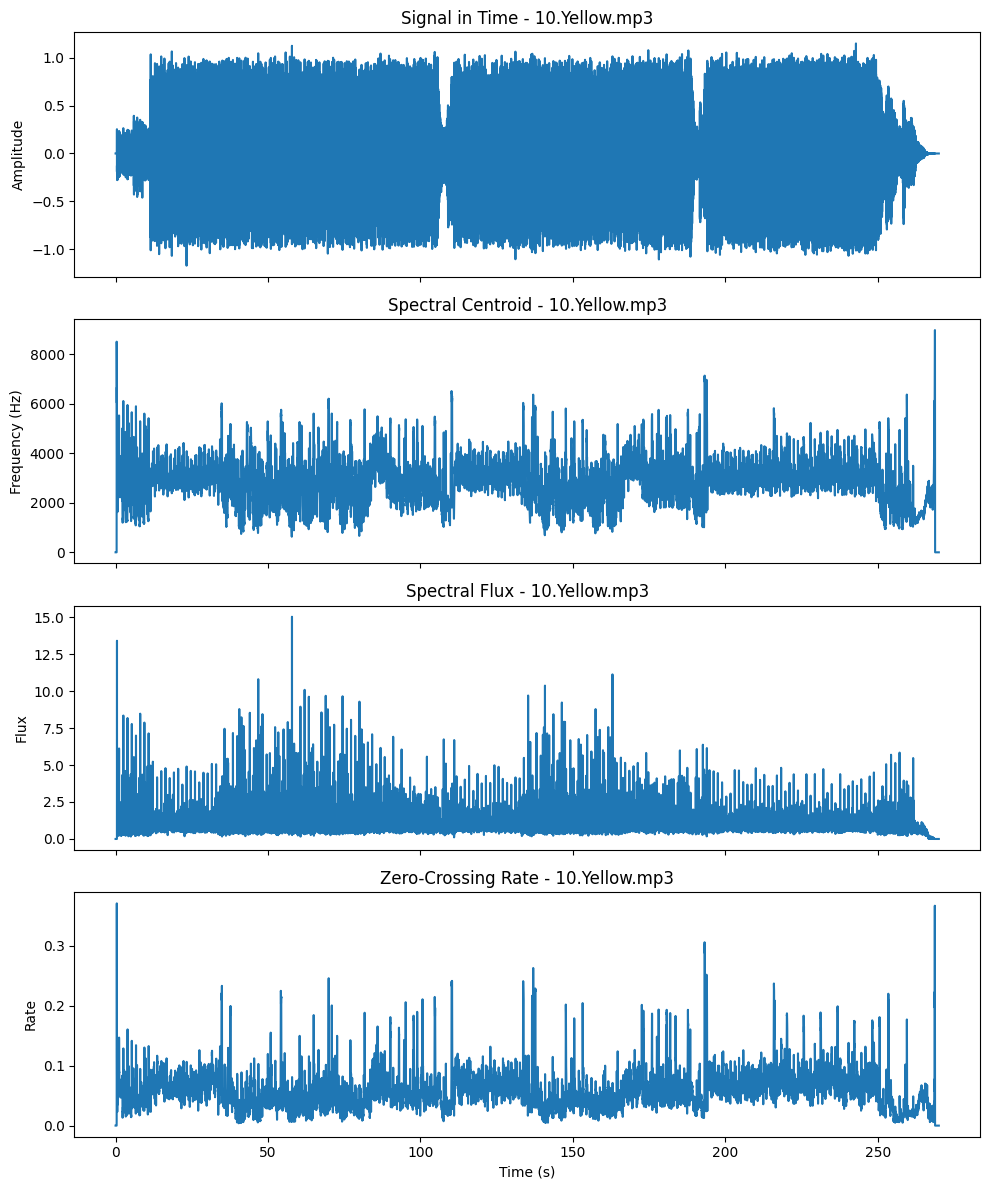


--- STATISTICAL ANALYSIS for 10.Yellow.mp3 ---
Statistics for Spectral Centroid
Mean: 2785.98
Standard Deviation: 931.17
Skewness: 0.37
Kurtosis: 1.40

Statistics for Spectral Flux
Mean: 0.95
Standard Deviation: 0.78
Skewness: 5.17
Kurtosis: 40.18

Statistics for Zero-Crossing Rate
Mean: 0.06
Standard Deviation: 0.03
Skewness: 1.90
Kurtosis: 7.79



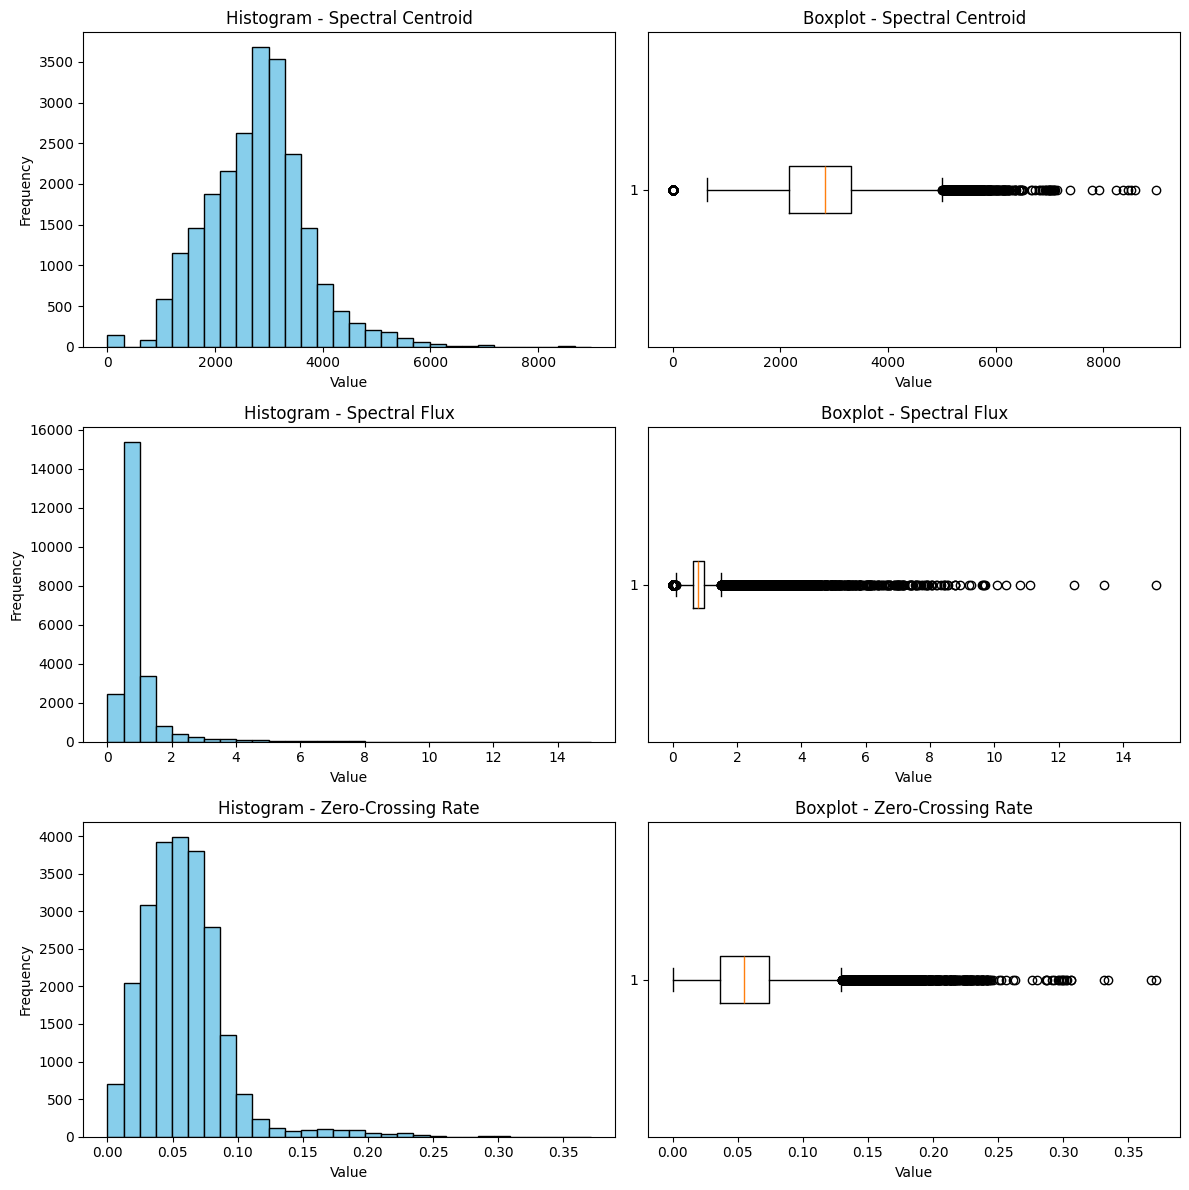


--- PROCESSING MUSIC: Dia Branco.mp3 ---

--- SPECTRAL ANALYSIS ---
Size of times_attributes: 17148
Size of spectral_centroid: 17148
Size of spectral_flux: 17148
Size of zero_crossing_rate: 17148



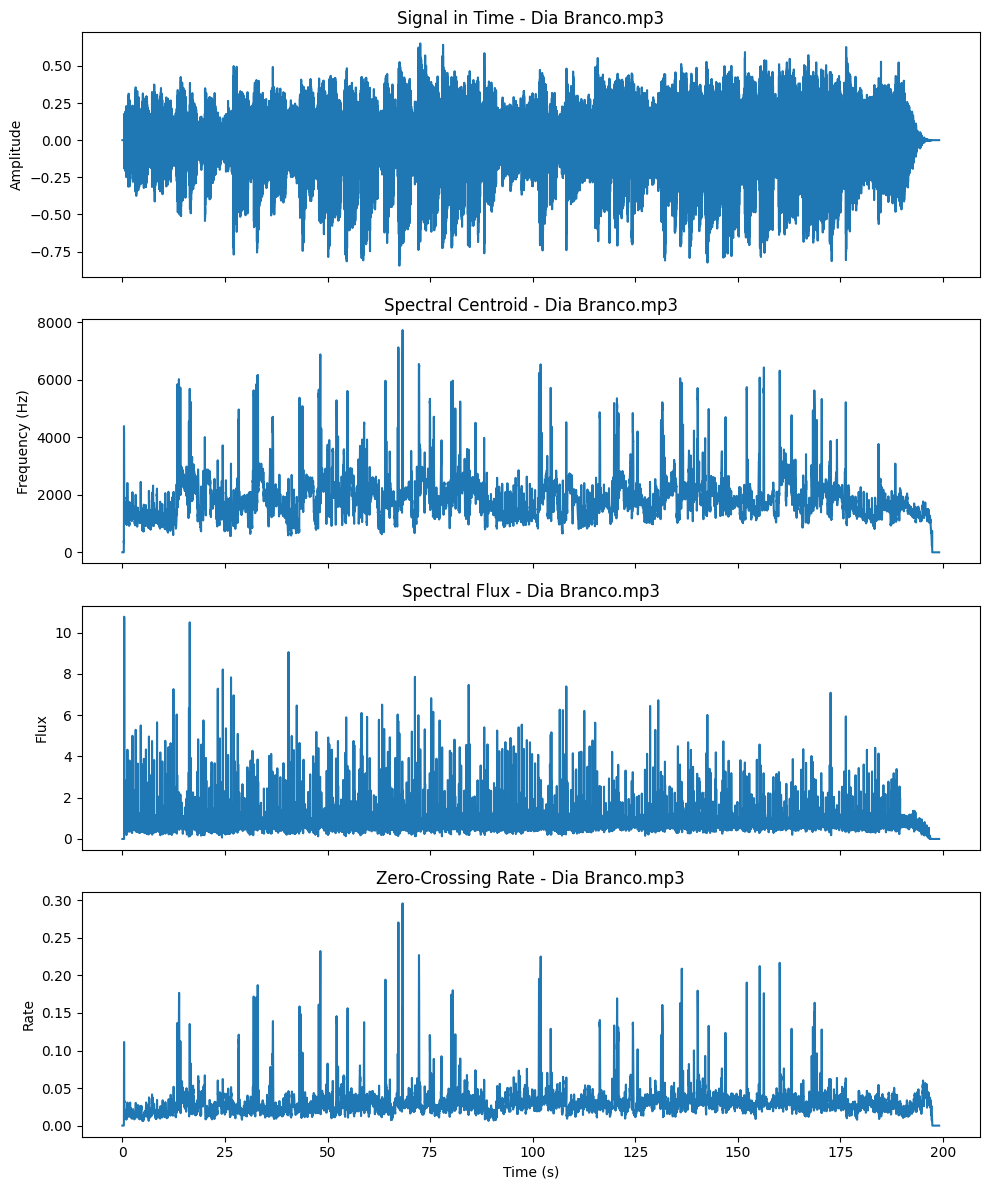


--- STATISTICAL ANALYSIS for Dia Branco.mp3 ---
Statistics for Spectral Centroid
Mean: 1844.19
Standard Deviation: 815.97
Skewness: 2.02
Kurtosis: 7.46

Statistics for Spectral Flux
Mean: 0.87
Standard Deviation: 0.67
Skewness: 4.25
Kurtosis: 27.79

Statistics for Zero-Crossing Rate
Mean: 0.03
Standard Deviation: 0.02
Skewness: 4.35
Kurtosis: 27.12



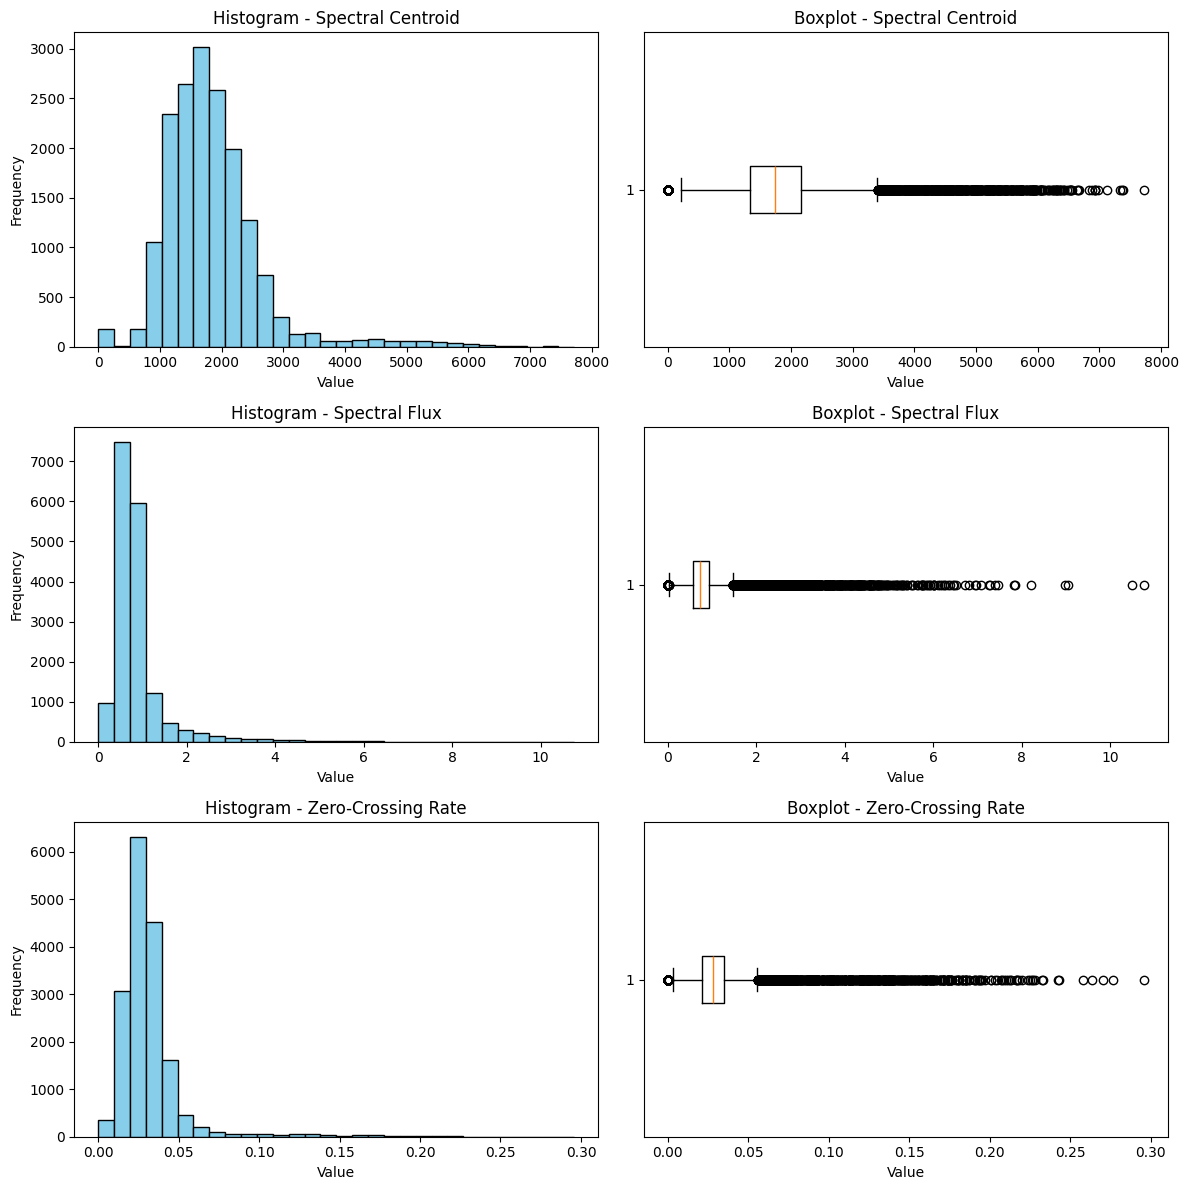


--- PROCESSING MUSIC: 04-jack_johnson-angel.mp3 ---

--- SPECTRAL ANALYSIS ---
Size of times_attributes: 10618
Size of spectral_centroid: 10618
Size of spectral_flux: 10618
Size of zero_crossing_rate: 10618



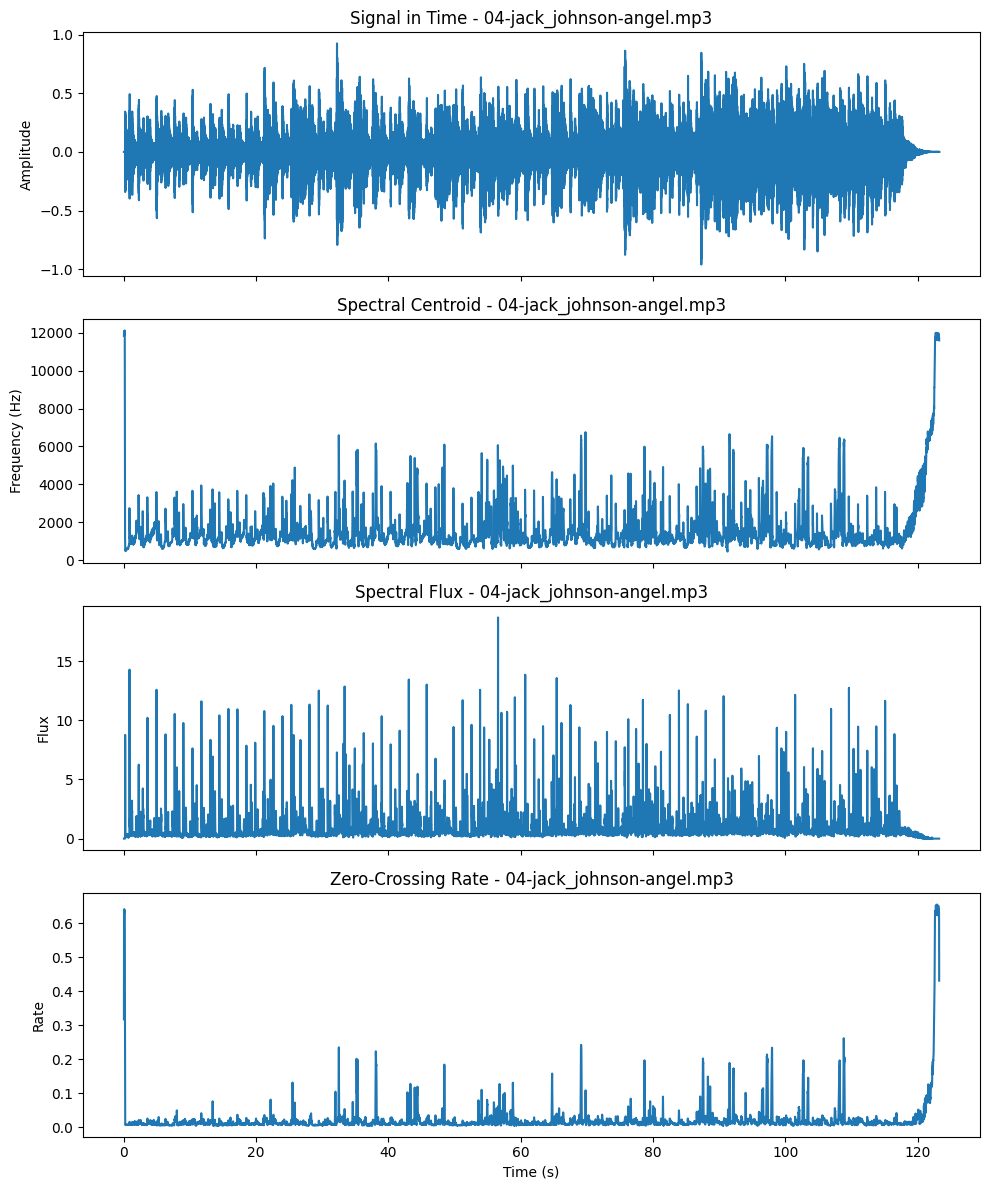


--- STATISTICAL ANALYSIS for 04-jack_johnson-angel.mp3 ---
Statistics for Spectral Centroid
Mean: 1593.27
Standard Deviation: 1363.31
Skewness: 4.18
Kurtosis: 22.71

Statistics for Spectral Flux
Mean: 0.88
Standard Deviation: 1.21
Skewness: 5.29
Kurtosis: 37.97

Statistics for Zero-Crossing Rate
Mean: 0.02
Standard Deviation: 0.06
Skewness: 8.46
Kurtosis: 81.97



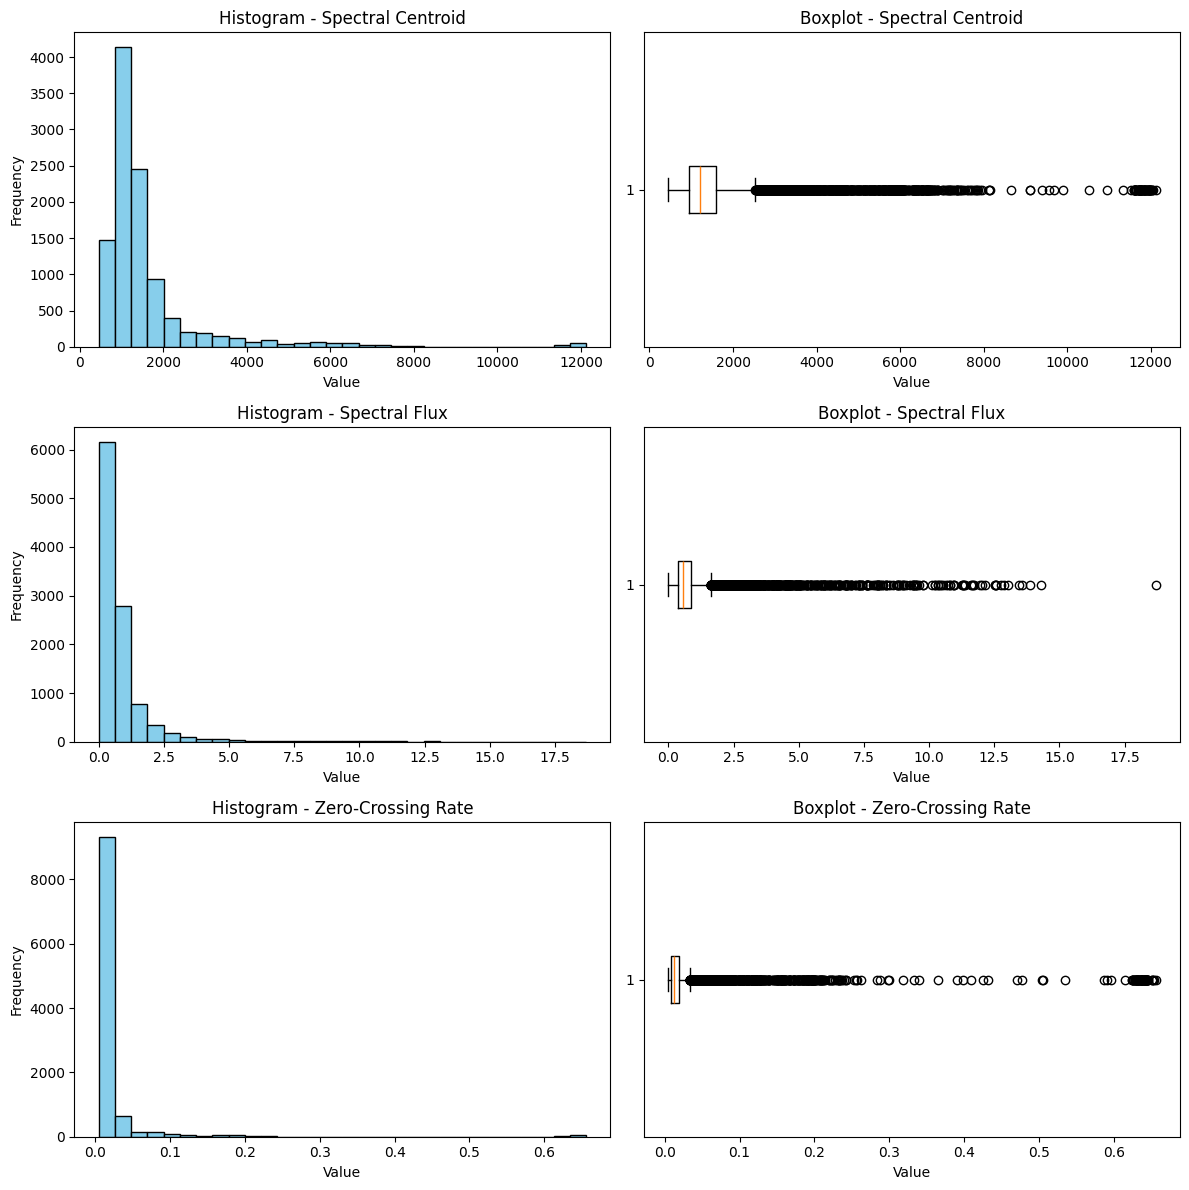

In [45]:
# Analysis of Spectral Features and Statistical Properties of Audio Signals:

# List of audio files (replace with your own paths)
audio_files = ['10.Yellow.mp3', 'Dia Branco.mp3', '04-jack_johnson-angel.mp3']

# Function to calculate statistics
def calc_statistics(attribute, attribute_name):
    mean_val = np.mean(attribute)
    std_dev = np.std(attribute)
    skewness = stats.skew(attribute)
    kurtosis = stats.kurtosis(attribute)

    print(f"Statistics for {attribute_name}")
    print(f"Mean: {mean_val:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print('')

    return mean_val, std_dev, skewness, kurtosis

# Loop through each music file
for audio_path in audio_files:
    print('')
    print(f"--- PROCESSING MUSIC: {audio_path} ---")
    print('')

    # --- SPECTRAL ANALYSIS ---
    y, sr = librosa.load(audio_path, sr=None, duration=None)  # Load the audio file

    # Parameters for feature extraction
    n_fft = 2048
    hop_length = 512

    # Extract the spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).flatten()

    # Extract spectral flux
    spectral_flux = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

    # Extract zero-crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length).flatten()

    # Calculate the time axis
    num_frames = min(len(spectral_centroid), len(spectral_flux), len(zero_crossing_rate))
    times_attributes = np.arange(num_frames) * hop_length / sr

    # Truncate features to the same size
    spectral_centroid = spectral_centroid[:num_frames]
    spectral_flux = spectral_flux[:num_frames]
    zero_crossing_rate = zero_crossing_rate[:num_frames]

    # Display sizes for debugging
    print('--- SPECTRAL ANALYSIS ---')
    print("Size of times_attributes:", len(times_attributes))
    print("Size of spectral_centroid:", len(spectral_centroid))
    print("Size of spectral_flux:", len(spectral_flux))
    print("Size of zero_crossing_rate:", len(zero_crossing_rate))
    print('')

    # Create plots for the extracted features
    fig2, ax2 = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

    # Plot the signal in the time domain
    ax2[0].plot(np.arange(len(y)) / sr, y)
    ax2[0].set_title(f"Signal in Time - {audio_path}")
    ax2[0].set_ylabel("Amplitude")

    # Plot the spectral centroid
    ax2[1].plot(times_attributes, spectral_centroid)
    ax2[1].set_title(f"Spectral Centroid - {audio_path}")
    ax2[1].set_ylabel("Frequency (Hz)")

    # Plot the spectral flux
    ax2[2].plot(times_attributes, spectral_flux)
    ax2[2].set_title(f"Spectral Flux - {audio_path}")
    ax2[2].set_ylabel("Flux")

    # Plot the zero-crossing rate
    ax2[3].plot(times_attributes, zero_crossing_rate)
    ax2[3].set_title(f"Zero-Crossing Rate - {audio_path}")
    ax2[3].set_xlabel("Time (s)")
    ax2[3].set_ylabel("Rate")

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

    # --- STATISTICAL ANALYSIS ---
    print(f"\n--- STATISTICAL ANALYSIS for {audio_path} ---")

    # Calculate and display the statistics for each attribute
    attributes = {
        "Spectral Centroid": spectral_centroid,
        "Spectral Flux": spectral_flux,
        "Zero-Crossing Rate": zero_crossing_rate
    }

    statistics = {}
    for name, attribute in attributes.items():
        statistics[name] = calc_statistics(attribute, name)

    # --- PLOTTING HISTOGRAMS AND BOXPLOTS ---
    fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12))

    # Plot histograms and boxplots
    for i, (attr_name, attr_values) in enumerate(attributes.items()):
        # Histogram
        ax3[i, 0].hist(attr_values, bins=30, color='skyblue', edgecolor='black')
        ax3[i, 0].set_title(f"Histogram - {attr_name}")
        ax3[i, 0].set_xlabel("Value")
        ax3[i, 0].set_ylabel("Frequency")

        # Boxplot
        ax3[i, 1].boxplot(attr_values, vert=False)
        ax3[i, 1].set_title(f"Boxplot - {attr_name}")
        ax3[i, 1].set_xlabel("Value")

    plt.tight_layout()
    plt.show()
